# **Introducing EDA(Exploratory Data Analysis)**

**Es necesario ya tener una idea de que significa cada columna y en el nivel en el que esta cada columna**

In [1]:
import pandas as pd

iris = pd.read_csv('resources\datasets-uci-iris.csv',
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Este método nos da una buena idea acderca de cada caracteística númerica y a demás de los quantiles (25%, 50%,75%), para visualizar graficamente usemos:

<AxesSubplot:>

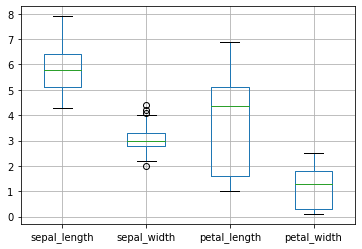

In [2]:
iris.boxplot(return_type='axes')


In [3]:
# saber los diferentes rasgos categoricos
iris.target.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

To examine the relationship between features, you can create a co-occurrence matrix or a similarity matrix

In [4]:
# verificar cuantas observaciones estan por encima de la media de 'petal_length' y cuantas
# estan por encima de la media de 'petal_width' simultanemaente
pd.crosstab(iris['petal_length'] > 3.758667,
            iris['petal_width'] > 1.198667)


petal_width,False,True
petal_length,,
False,56,1
True,4,89


Podemos pensar que  hay una realción ente estas dos caracteristicas y podemos verificarlo graficamente com sigue:

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

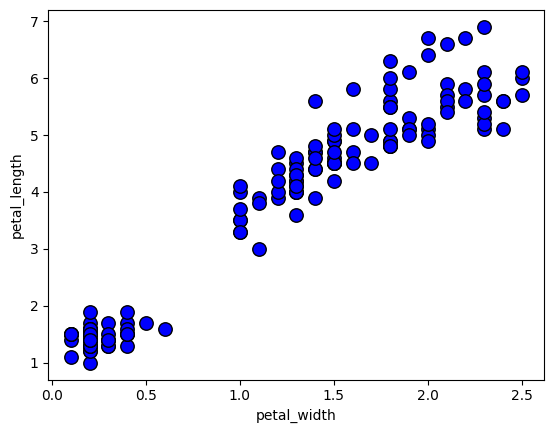

In [5]:
iris.plot(kind='scatter', x='petal_width', y='petal_length',
          s=94, c='blue', edgecolors='black')


Y como sospechabamosmla tendencia es bastante marcadapor lo que estas dos caracteristicas estan fuertemente relacionadas

## **Obtener un aproximado de la distribución de una característica mediante un Histograma**

<AxesSubplot:ylabel='Frequency'>

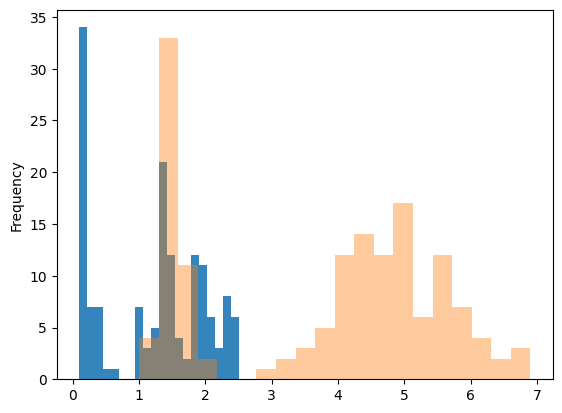

In [6]:
iris.petal_width.plot(kind='hist', alpha=0.9, bins=20)
iris.petal_length.plot(kind='hist', alpha=0.4, bins=20)
# hemos elegido 20 bins( contenedores) pero para otras situaciones podria ser una valor
# muy grande o muy pequeño.En este caso 150/20 es 7.5 muestras por barra
# El valor por defaut para bins es la raiz cuadrada del tamaño de la muestra.


Como ya habiamos supuesto de hipotesis que estas dos caracteristicas estaban fuertemente relacionadas podemos ver que su distribución de probabilidades es bastante similar

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cali = datasets._california_housing.fetch_california_housing()
X = cali['data']
Y = cali['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(cali.feature_names, '\n', cali.data.shape)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 
 (20640, 8)


In [8]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, Y_train)
Y_est = regressor.predict(X_test)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 1.119796474154996


Este resultado de MSE puede parecer bajo. Pero intentemos hacerlo mejor y para eso vamos a normalizar todas las caracteristicas

In [9]:
'''normalizar las caracteristicas con la notación Z'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)

Y_est = regressor.predict(X_test_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.4230454760790581


>Con la ayuda de este sencillo paso, reducimos el MAE a más de la mitad,no utilizamos las características originales, sino su modificación lineal

En lugar de la **normalización Z**, podemos utilizar una función de escala en las características
que es más robusta a los valores atípicos, **RobustScaler**.Este escalador, en lugar de utilizar la media y la desviación estándar, **utiliza la mediana y el rango intercuartílico (IQR)**, es decir, el primer y el tercer cuartil) para escalar cada característica independientemente. Es más robusto que los valores atípicos, ya que la mediana y el IQR no se ven tan influenciadas como la media y la varianza si unos pocos puntos (eventualmente
sólo uno) se alejan del centro , por ejemplo, debido a una lectura defectuosa


In [10]:
'''escalar los datos'''
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)
Y_est = regressor.predict(X_test_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.4145149601220261


Una vez que investigas un poco en el dominio y exploramos los datos llegaremos(entre otras) a la conclusion de que hay una gran diferencia entre el precio de una casa donde vive una sola persona a una donde viven tres. Sin embargo no hay mucha diferencia entre una casa de 10 habitantes y una de 13. Podemos penalizar los valores altos de habitantes **aplicando una transformacion no lineal** a la carracteristica 'AveOccup', calcular su raiz cuadrada

In [11]:
'''tranformacion no lineal a una caracteristica, en este caso la raiz cuadrada'''
non_linear_feat = 5  # AveOccup

# add new feature
new_feat = np.sqrt(X_train[:, non_linear_feat])
X_train_extended = np.column_stack((X_train, new_feat))

new_feat = np.sqrt(X_test[:, non_linear_feat])
X_test_extended = np.column_stack((X_test, new_feat))

# normalizar con la notacion Z
scaler = StandardScaler()
X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extended_scaled = scaler.transform(X_test_extended)

regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, Y_train)
Y_est = regressor.predict(X_test_extended_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.3455007820752451


Este sencillo ejemplo de debería demostrar la importancia que tiene la aplicación de trasnf. lineales y no lineales encontradas en la EDA para encontrar caracteristicas que estén conceptualmente mas relacioandas con la variable objetivo

# **Building new features**

In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cali = datasets._california_housing.fetch_california_housing()
X = cali['data']
Y = cali['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(cali.feature_names, '\n', cali.data.shape)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 
 (20640, 8)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, Y_train)
Y_est = regressor.predict(X_test)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 1.1137813518373372


Este resultado de MSE puede parecer bajo. Pero intentemos hacerlo mejor y para eso vamos a normalizar todas las caracteristicas

In [14]:
'''normalizar las caracteristicas con la notación Z'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)

Y_est = regressor.predict(X_test_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.3709321061203924


>Con la ayuda de este sencillo paso, reducimos el MAE a más de la mitad,no utilizamos las características originales, sino su modificación lineal

En lugar de la **normalización Z**, podemos utilizar una función de escala en las características
que es más robusta a los valores atípicos, **RobustScaler**.Este escalador, en lugar de utilizar la media y la desviación estándar, **utiliza la mediana y el rango intercuartílico (IQR)**, es decir, el primer y el tercer cuartil) para escalar cada característica independientemente. Es más robusto que los valores atípicos, ya que la mediana y el IQR no se ven tan influenciadas como la media y la varianza si unos pocos puntos (eventualmente
sólo uno) se alejan del centro , por ejemplo, debido a una lectura defectuosa


In [15]:
'''escalar los datos'''
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, Y_train)
Y_est = regressor.predict(X_test_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.42475748330249896


Una vez que investigas un poco en el dominio y exploramos los datos llegaremos(entre otras) a la conclusion de que hay una gran diferencia entre el precio de una casa donde vive una sola persona a una donde viven tres. Sin embargo no hay mucha diferencia entre una casa de 10 habitantes y una de 13. Podemos penalizar los valores altos de habitantes **aplicando una transformacion no lineal** a la carracteristica 'AveOccup', calcular su raiz cuadrada

In [16]:
'''tranformacion no lineal a una caracteristica, en este caso la raiz cuadrada'''
non_linear_feat = 5  # AveOccup

# add new feature
new_feat = np.sqrt(X_train[:, non_linear_feat])
X_train_extended = np.column_stack((X_train, new_feat))

new_feat = np.sqrt(X_test[:, non_linear_feat])
X_test_extended = np.column_stack((X_test, new_feat))

# normalizar con la notacion Z
scaler = StandardScaler()
X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extended_scaled = scaler.transform(X_test_extended)

regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, Y_train)
Y_est = regressor.predict(X_test_extended_scaled)
print("MSE=", mean_squared_error(Y_test, Y_est))


MSE= 0.3482831694049932


Este sencillo ejemplo de debería demostrar la importancia que tiene la aplicación de trasnf. lineales y no lineales encontradas en la EDA para encontrar caracteristicas que estén conceptualmente mas relacioandas con la variable objetivo